In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
x = pd.read_excel('train.xlsx',usecols='B:U').values
y = pd.read_excel('train.xlsx',usecols='V').values.reshape(1500,)
p = pd.read_excel('test.xlsx',usecols='B:U').values

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.6)



In [4]:
from sklearn.preprocessing import StandardScaler
standarScaler = StandardScaler()
standarScaler.fit(x_train)
x_train = standarScaler.transform(x_train)

standarScaler.fit(x_test)
x_test = standarScaler.transform(x_test)

In [5]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(n_estimators=500,random_state=666,oob_score=True,n_jobs=-1)

rf_clf.fit(x_train,y_train)

y_predict = rf_clf.predict(x_test)
print(rf_clf.score(x_test,y_test))
y_predict

0.855


array([2, 1, 1, 3, 0, 1, 1, 3, 3, 3, 0, 1, 2, 3, 0, 3, 3, 1, 2, 1, 1, 0,
       1, 0, 0, 0, 2, 3, 1, 1, 0, 3, 0, 0, 2, 3, 1, 0, 2, 1, 0, 1, 1, 1,
       2, 1, 2, 1, 2, 2, 2, 0, 0, 2, 3, 1, 3, 3, 3, 2, 0, 0, 1, 2, 3, 1,
       0, 3, 1, 0, 3, 2, 1, 0, 0, 0, 2, 0, 3, 3, 0, 2, 2, 2, 1, 2, 3, 3,
       3, 3, 0, 1, 3, 0, 1, 2, 1, 3, 1, 3, 2, 0, 1, 0, 0, 0, 0, 1, 0, 2,
       3, 0, 2, 2, 0, 3, 3, 1, 2, 2, 0, 2, 0, 2, 1, 2, 3, 1, 0, 3, 3, 0,
       3, 1, 2, 3, 3, 2, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 3, 3, 1, 0, 1, 1,
       2, 2, 0, 2, 0, 2, 1, 2, 0, 1, 3, 1, 1, 1, 1, 3, 1, 0, 0, 1, 0, 2,
       2, 3, 0, 3, 1, 0, 2, 0, 3, 1, 2, 2, 3, 1, 3, 2, 2, 3, 1, 3, 1, 1,
       1, 3, 2, 3, 0, 0, 2, 3, 2, 0, 1, 0, 0, 0, 0, 3, 0, 0, 0, 3, 1, 2,
       0, 3, 0, 2, 1, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 3, 2, 0, 0, 1, 1,
       3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 3, 3, 0, 2, 1, 3, 2, 1, 0, 0, 2, 0,
       0, 2, 0, 1, 1, 0, 1, 0, 1, 0, 2, 0, 2, 1, 0, 3, 3, 0, 1, 1, 2, 1,
       3, 3, 2, 1, 1, 3, 2, 3, 0, 2, 3, 3, 2, 0, 2,

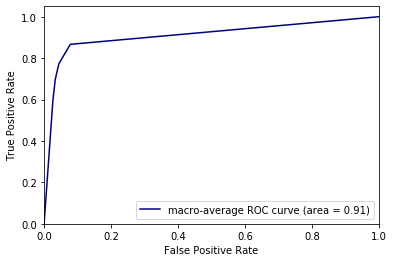

In [5]:
fpr = dict()
tpr = dict()
roc_auc = dict()

from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve,auc
from scipy import interp

y_test = label_binarize(y_test, classes=[0, 1, 2, 3])
y_predict = label_binarize(y_predict,classes=[0, 1, 2, 3])
n_classes = y_test.shape[1]
#得到每个点的roc曲线值
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_predict[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))   #拼接fpr数组并去除重复数字

mean_tpr = np.zeros_like(all_fpr)           #创建一个与all_fpr同维数的矩阵
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

mean_tpr /= n_classes
roc_auc["macro"] = auc(all_fpr, mean_tpr)
plt.plot(all_fpr, mean_tpr,
        label='macro-average ROC curve (area = {0:0.2f})'
         ''.format(roc_auc["macro"]),
         color='navy')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")  #表注
plt.show()

In [6]:
# k = 4   #四折交叉验证
# 
# k_samples_count = x_train.shape[0]//k
# 
# for fold in range(k):
#     validation_begin = k_samples_count*fold
#     validation_end = k_samples_count*(fold+1)
#     
#     validation_data = x_train[validation_begin:validation_end]
#     
#     train_data = np.vstack([
#         x_train[:validation_begin],
#         x_train[validation_end:]
#     ])


In [6]:
from sklearn.model_selection import cross_val_score
rf_clf = rf_clf = RandomForestClassifier(n_estimators=500,random_state=666,oob_score=True,n_jobs=-1)
cross_val_score(rf_clf,x_train,y_train)




E:\Anaconda3\Anaconda3_setup\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


array([0.86626747, 0.852     , 0.87975952])